In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#데이터전처리

#파일불러오기
df = pd.read_csv('/content/vgames2.csv')

#비어있는 값 제거 및 간단한 처리
df = df.dropna()
df = df.drop(df.columns[[0]], axis =1)
region = df.iloc[:,5:]

#존재하지 않는 연도 제거 및 연도별 정렬
df.Year = df.Year.astype('int')
df = df.sort_values(by ='Year').reset_index(drop = True)
df[df['Year']<1500].count()  #100개가 말도 안되는 연도 그 위로도 테스트 해봐도 100개
df = df.drop(df.index[0:100]).reset_index(drop = True)

#K,M 단위 제거하고 float으로 바꾸기
def value_to_float(x):
  if 'K' in x:
    if len(x)>1:
      return float(x.replace('K',''))*1000
  if 'M' in x:
    if len(x)>1:
      return float(x.replace('M',''))*1000000
  else:
    return float(x)*1000000    

#그 값 모든 칼럼에 적용하고 단위를 MILLION단위로 통일
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)  
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)  
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)  
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)  
df.iloc[:,5:]= df.iloc[:,5:]/1000000

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03
1,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.0,0.00
2,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01
3,Freeway,2600,1980,Action,Activision,0.32,0.02,0.0,0.00
4,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.0,0.00


# 1. 지역에 따른 게임 선호 장르

In [ ]:
df1 = df.copy()
df1 = df1.drop(df1.columns[[2]], axis =1)
df1 = df1.groupby('Genre').sum()
glob = df1.sum().sum()
df1_1 = df1/glob
df1_1 = round(df1_1,2)

In [ ]:
df1['Total_Sales'] = df1.sum(axis =1)
df1
df1.style.bar(subset=["NA_Sales"], color='lightgreen')\
                 .bar(subset=["EU_Sales"], color='#ee1f5f')\
                 .bar(subset=["JP_Sales"], color='#FFA07A')\
                 .bar(subset=['Other_Sales'], color ='#f0c929')\
                 .bar(subset=['Total_Sales'], color ='#75bbfd')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,855.960000,512.520000,155.730000,183.640000,1707.850000
Adventure,101.330000,63.320000,51.790000,16.640000,233.080000
Fighting,220.110000,99.720000,86.390000,36.100000,442.320000
Misc,394.290000,207.680000,103.710000,72.540000,778.220000
Platform,442.460000,199.400000,129.220000,51.150000,822.230000
Puzzle,121.000000,50.390000,56.190000,12.390000,239.970000
Racing,353.570000,234.200000,55.420000,76.230000,719.420000
Role-Playing,307.080000,176.310000,336.250000,54.710000,874.350000
Shooter,570.890000,307.260000,37.340000,100.820000,1016.310000


In [ ]:
df1_1['total_sales'] = df1_1.sum(axis=1)
df1_1

#장르별 매출의 총합과 각 지역의 상관관계
print('JAPAN:', np.corrcoef(df1_1['JP_Sales'],df1_1['total_sales']))
print('\nNA:', np.corrcoef(df1_1['NA_Sales'],df1_1['total_sales']))
print('\nEU:', np.corrcoef(df1_1['EU_Sales'],df1_1['total_sales']))
print('\nOther', np.corrcoef(df1_1['Other_Sales'],df1_1['total_sales']))

#그렇다면 일본을 제외한 세 지역의 상관관계는 높은가? (3지역 비교 f-statics)
from scipy.stats import f_oneway
print(f_oneway(df1_1['NA_Sales'],df1_1['EU_Sales'],df1_1['Other_Sales']))
#귀무가설 : 세 지역의 평균이 같다. 
#대안가설 : 같지 않다. 
#pvalue = 0 -> 같지 않다. 

print(f_oneway(df1_1['EU_Sales'],df1_1['Other_Sales']))

JAPAN: [[1.        0.3760486]
 [0.3760486 1.       ]]

NA: [[1.         0.97429968]
 [0.97429968 1.        ]]

EU: [[1.         0.94836323]
 [0.94836323 1.        ]]

Other [[1.         0.96787096]
 [0.96787096 1.        ]]
F_onewayResult(statistic=9.417419354838703, pvalue=0.0005810601715751187)
F_onewayResult(statistic=9.477326968973749, pvalue=0.005493857632649967)


In [ ]:
df1_1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Genre,,,,,
Action,0.10,0.06,0.02,0.02,0.20
Adventure,0.01,0.01,0.01,0.00,0.03
Fighting,0.03,0.01,0.01,0.00,0.05
Misc,0.05,0.02,0.01,0.01,0.09
Platform,0.05,0.02,0.01,0.01,0.09
Puzzle,0.01,0.01,0.01,0.00,0.03
Racing,0.04,0.03,0.01,0.01,0.09
Role-Playing,0.04,0.02,0.04,0.01,0.11
Shooter,0.07,0.04,0.00,0.01,0.12


In [ ]:
!pip install pingouin
import pingouin as pg

r = correlation coefficient.

In [ ]:
df3.corr().round(2)

NameError: ignored

In [ ]:
!pip install mplppt

In [ ]:
corrMat= df3.corr().round(2)
sns.heatmap(corrMat, annot= True)
plt.title('Correlation between Regions')
plt.savefig('correlation.png')
plt.show()

NameError: ignored

일본을 제외한 모든 지역에서 1-3위가 액션, 스포츠, 슈터로 순위가 동일하다. 즉 지역에 관계없이 전세계의 사람들은 비슷한 장르를 선호한다는 것을 알 수 있으며 장르별 세계매출과 지역매출의 상관관계가 세 지역 모두에서 0.97% 이상이라는 것이 이를 증명한다. 반면, 일본의 선호 게임장르는 타지역의 선호와는 독립적이며, 가장 선호하는 장르는 롤플레이로, 2위 액션과는 두 배 이상 차이가 난다. 

# 2. 연도별 게임의 트렌드

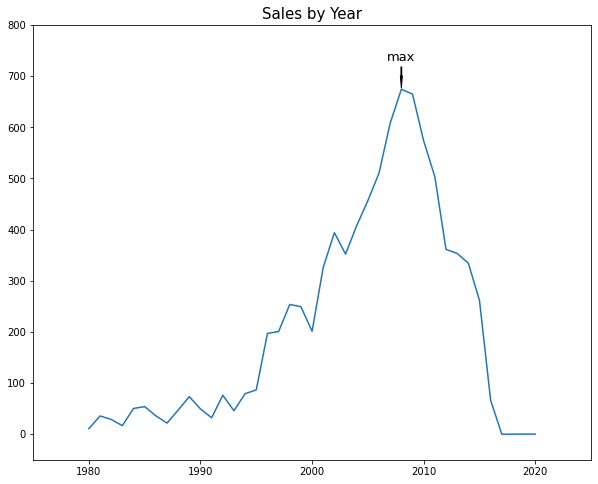

In [ ]:
df2 = df.copy()
df2.Year= df2.Year.astype('object')

sales= df2.groupby('Year').sum().sum(axis=1)

ax,figure = plt.subplots(figsize = (10,8))
plt.xlim(1975, 2025)
plt.ylim(-50,800)
plt.plot(sales)

plt.title('Sales by Year', fontsize = 15)

plt.annotate('max', xy=(2008,674.24), xytext= (2008,730), fontsize = 13, ha = 'center',arrowprops = dict(facecolor = 'black', width = 0.8, shrink= 0.05, headwidth = 2))

plt.show()


In [ ]:
#연도 데이터 전처리한 만능 데이터
#참고 : https://rfriend.tistory.com/384?category=675917

for (year),group_data in df2[['Year','Genre','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby('Year'):
  
  print(year)
  print(group_data[:10])

trend = dict(list(df2[:][['Year','Genre','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby('Year')))

In [ ]:
a= [trend[1980],trend[1981],trend[1982],trend[1983],trend[1984]]
a = pd.concat(a)
a = a.groupby('Genre').sum().sum(axis =1).to_frame(name = 'Sales(M)').reset_index()
a.sort_values(by= 'Sales(M)', ascending = False).reset_index(drop = True)


,Genre,Sales(M)
0,Shooter,52.49
1,Action,26.34
2,Platform,19.57
3,Puzzle,16.21
4,Sports,11.21
5,Racing,8.00
6,Misc,7.16
7,Fighting,0.77
8,Simulation,0.44
9,Adventure,0.40


In [ ]:
b= [trend[1986],trend[1987],trend[1988],trend[1989],trend[1985],trend[1990],trend[1991],trend[1992],trend[1993],trend[1994]]
b = pd.concat(b)
b = b.groupby('Genre').sum().sum(axis =1).to_frame(name = 'Sales(M)').reset_index()
#a = a.groupby('Genre').sum().sum(axis =1).to_frame(name = 'Sales(M)').reset_index()
b = b.sort_values(by= 'Sales(M)', ascending = False).reset_index(drop = True)
b.style.set_caption('Colormaps, with a caption.')\
    .background_gradient()

,Genre,Sales(M)
0,Platform,193.100000
1,Puzzle,65.310000
2,Action,45.110000
3,Role-Playing,42.610000
4,Sports,39.630000
5,Fighting,39.290000
6,Racing,23.080000
7,Adventure,22.670000
8,Shooter,20.930000
9,Misc,9.460000


In [ ]:
d= [trend[1995],trend[1996],trend[1997],trend[1998],trend[1999]]
d = pd.concat(d)
d = d.groupby('Genre').sum().sum(axis =1).to_frame(name = 'Sales(M)').reset_index()
d = d.sort_values(by= 'Sales(M)', ascending = False).reset_index(drop = True)
d.style.set_caption('Colormaps, with a caption.')\
    .background_gradient()

,Genre,Sales(M)
0,Role-Playing,155.410000
1,Racing,128.840000
2,Sports,127.380000
3,Action,117.980000
4,Platform,116.510000
5,Fighting,90.390000
6,Misc,55.250000
7,Shooter,54.620000
8,Strategy,51.200000
9,Simulation,43.710000


In [ ]:
e= [trend[2000],trend[2001],trend[2002],trend[2003],trend[2004]]
e = pd.concat(e)
e= e.groupby('Genre').sum().sum(axis =1).to_frame(name = 'Sales(M)').reset_index()

e = e.sort_values(by= 'Sales(M)', ascending = False).reset_index(drop = True)
e.style.set_caption('Colormaps, with a caption.')\
    .background_gradient()

,Genre,Sales(M)
0,Action,321.140000
1,Sports,273.050000
2,Racing,201.850000
3,Platform,187.680000
4,Role-Playing,180.390000
5,Shooter,153.280000
6,Fighting,103.830000
7,Misc,97.390000
8,Simulation,65.530000
9,Strategy,36.460000


In [ ]:
f= [trend[2005],trend[2006],trend[2007],trend[2008],trend[2009]]
f = pd.concat(f)
f = f.groupby('Genre').sum().sum(axis =1).to_frame(name = 'Sales(M)').reset_index()
f = f.sort_values(by= 'Sales(M)', ascending = False).reset_index(drop = True)
f.style.set_caption('Colormaps, with a caption.')\
    .background_gradient()

,Genre,Sales(M)
0,Action,527.790000
1,Sports,527.330000
2,Misc,380.360000
3,Shooter,278.590000
4,Racing,234.160000
5,Role-Playing,231.720000
6,Simulation,199.500000
7,Platform,184.640000
8,Fighting,126.910000
9,Puzzle,90.160000


In [ ]:
g= [trend[2010],trend[2011],trend[2012],trend[2013],trend[2014],trend[2015]]
g = pd.concat(g)
g = g.groupby('Genre').sum().sum(axis =1).to_frame(name = 'Sales(M)').reset_index()
g = g.sort_values(by= 'Sales(M)', ascending = False).reset_index(drop = True)
g.style.set_caption('Colormaps, with a caption.')\
    .background_gradient()
#action(581),shotter(376),sports(265)
#지는해지만 그래도 이때까지 action은 트렌드였다. 액션이 아닌 다른게 떨어진 것이다.  


,Genre,Sales(M)
0,Action,649.650000
1,Shooter,442.430000
2,Sports,307.270000
3,Role-Playing,257.430000
4,Misc,227.510000
5,Racing,121.870000
6,Platform,118.650000
7,Fighting,77.280000
8,Simulation,70.160000
9,Adventure,59.000000


In [ ]:
h= [trend[2016],trend[2017],trend[2020]]
h = pd.concat(h)
h =h.groupby('Genre').sum().sum(axis =1).to_frame(name = 'Sales(M)').reset_index()
h = h.sort_values(by= 'Sales(M)', ascending = False).reset_index(drop = True)
h.style.set_caption('Colormaps, with a caption.')\
    .background_gradient()

,Genre,Sales(M)
0,Action,19.840000
1,Sports,14.460000
2,Shooter,13.970000
3,Role-Playing,6.790000
4,Fighting,3.850000
5,Platform,2.080000
6,Adventure,1.790000
7,Racing,1.620000
8,Misc,1.090000
9,Simulation,0.680000


In [ ]:
#시대별 트렌드 
a= [trend[1980],trend[1981],trend[1982],trend[1983],trend[1984]]
a = pd.concat(a)
a.groupby('Genre').sum().sum(axis =1)
#shooter(52),action(26)

b= [trend[1986],trend[1987],trend[1988],trend[1989],trend[1985],trend[1990],trend[1991],trend[1992],trend[1993],trend[1994]]
b = pd.concat(b)
b.groupby('Genre').sum().sum(axis =1)
#플랫폼(101), 퍼즐(46)

c= [trend[1990],trend[1991],trend[1992],trend[1993],trend[1994]]
c = pd.concat(c)
c.groupby('Genre').sum().sum(axis =1)
#platform(91)

d= [trend[1995],trend[1996],trend[1997],trend[1998],trend[1999]]
d = pd.concat(d)
d.groupby('Genre').sum().sum(axis =1)
#부흥기인가보다. role-playing(155),racing(128),sports(127),action(117),platform(116)

e= [trend[2000],trend[2001],trend[2002],trend[2003],trend[2004]]
e = pd.concat(e)
e.groupby('Genre').sum().sum(axis =1)
#action(321),sports(273),racing(201)

f= [trend[2005],trend[2006],trend[2007],trend[2008],trend[2009]]
f = pd.concat(f)
f.groupby('Genre').sum().sum(axis =1)
#action(527),sports(527),Misc(380)

g= [trend[2010],trend[2011],trend[2012],trend[2013],trend[2014]]
g = pd.concat(g)
g.groupby('Genre').sum().sum(axis =1)
#action(581),shotter(376),sports(265)
#지는해지만 그래도 이때까지 action은 트렌드였다. 액션이 아닌 다른게 떨어진 것이다.  

h= [trend[2015],trend[2016],trend[2017],trend[2020]]
h = pd.concat(h)
h.groupby('Genre').sum().sum(axis =1)
#action(88),shooter(80)
#2015    261.58
#2016     66.35
#2017      0.05

Genre
Action          88.04
Adventure        9.80
Fighting        11.63
Misc            12.60
Platform         8.13
Puzzle           0.69
Racing           9.54
Role-Playing    43.17
Shooter         80.09
Simulation       6.29
Sports          55.95
Strategy         2.34
dtype: float64

In [ ]:
1980-1985 :shooter(52),action(26)
1985-1990: platform(101),Puzzle(46)
1995-2000: platform(91)
2000-2005: role-playing(155),racing(128),sports(127),action(117),platform(116)
2005-2010: action(321),sports(273),racing(201)
2010-2015: action(581),shooter(376),sports(265)
2015-2020: action(88),shooter(80) =>0 from 2017

1980년대 초중반에 게임이 나오기 시작하여 80년대 후반에서 90년대엔 platform게임이 트렌드였다. 
그러나 2000년대 초반 롤플레이, 레이싱, 스포츠, 액션 등 다양한 게임장르가 고르게 인기를 가지게 되면서 게임매출액이 급격히 상승했다. 
2005년 이후로 롤플레이를 제외한 액션,스포츠,레이싱은 더 인기가 많아졌다.
2010년에서 2015년 사이엔 액션장르의 수요가 매우 많아, 지난 5년에 비해 250M이 증가했으며 슈터가 그 뒤를 이었다. 스포츠는 여전히 전과 같은 수요였다. 
2015년 이후, 게임매출은 매우 급격하게 줄어 매출이 적었으며, 2017년도 이후엔, 거의 존재하지 않음. 

# 3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
#새로운 데이터 생성 및 열 추가
df3 = df.copy()
df3.Year= df3.Year.astype('object')
df3['total_sales'] = df3.iloc[:,5:].sum(axis =1)
#세계매출 기준 큰 값 5개 정렬한 데이터 생성
top5 = df3.sort_values(by = 'total_sales', ascending=False).head(5).reset_index(drop=True)

In [ ]:
#melt해서 지역을 열의 값이 되게하기
top5 = top5.melt(id_vars=['Name','Platform','Year','Genre','Publisher'], value_vars = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','total_sales'])
top5 =top5.rename(columns ={'Name':'Game_Name','variable':'region','value':'Sales'})
top5

,Game_Name,Platform,Year,Genre,Publisher,region,Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,NA_Sales,41.49
1,Super Mario Bros.,NES,1985,Platform,Nintendo,NA_Sales,29.08
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,NA_Sales,15.85
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,NA_Sales,15.75
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,NA_Sales,11.27
5,Wii Sports,Wii,2006,Sports,Nintendo,EU_Sales,29.02
6,Super Mario Bros.,NES,1985,Platform,Nintendo,EU_Sales,3.58
7,Mario Kart Wii,Wii,2008,Racing,Nintendo,EU_Sales,12.88
8,Wii Sports Resort,Wii,2009,Sports,Nintendo,EU_Sales,11.01
9,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,EU_Sales,8.89


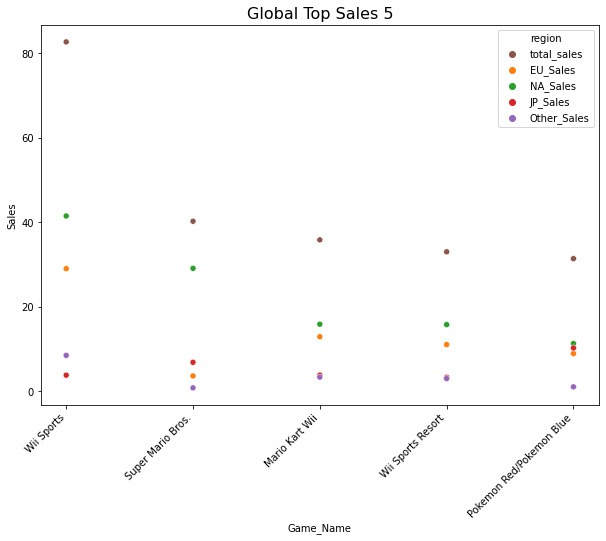

In [ ]:
#그래프로 나타내기
plt.figure(figsize=(10,7))
g= sns.scatterplot(data =top5, x='Game_Name', y ='Sales', hue ='region',palette= 'tab10', hue_order =['total_sales','EU_Sales','NA_Sales','JP_Sales','Other_Sales','total_sales'])
plt.setp(g.get_xticklabels(), rotation=45,horizontalalignment='right',fontweight='light')
plt.title('Global Top Sales 5', fontsize = 16)
plt.show()


다음분기에 어떤 게임을 만들것인가?

In [ ]:
trend[2015][trend[2015]['Platform']=='PS4'].sum()

Year                                                      274040
Genre          MiscRole-PlayingFightingRole-PlayingPlatformAc...
Platform       PS4PS4PS4PS4PS4PS4PS4PS4PS4PS4PS4PS4PS4PS4PS4P...
NA_Sales                                                   39.76
EU_Sales                                                   49.67
JP_Sales                                                    5.93
Other_Sales                                                 17.5
dtype: object

In [ ]:
trend[2016][trend[2016]['Platform']=='PS4'].sum()

Year                                                      211680
Genre          ShooterActionRole-PlayingShooterActionShooterR...
Platform       PS4PS4PS4PS4PS4PS4PS4PS4PS4PS4PS4PS4PS4PS4PS4P...
NA_Sales                                                   10.56
EU_Sales                                                   15.37
JP_Sales                                                    4.05
Other_Sales                                                 5.07
dtype: object

플랫폼결정=ps4

In [ ]:
#인기 플랫폼(전체)
df3.groupby('Platform').sum().sort_values(by='total_sales', ascending = False).head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Platform,,,,,
PS2,562.99,328.80,133.79,186.74,1212.32
X360,587.58,274.40,12.14,83.59,957.71
PS3,387.37,339.40,78.12,140.36,945.25
Wii,494.60,260.55,65.74,78.41,899.30
DS,381.37,190.59,168.73,59.33,800.02


In [ ]:
#2010년 이후 인기 플랫폼
df3[df3['Year']>2010].groupby('Platform').sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Platform,,,,,
3DS,72.76,54.18,92.53,11.75,231.22
DS,20.36,10.22,7.94,2.82,41.34
PC,28.84,53.95,0.00,12.47,95.26
PS2,0.13,0.13,0.09,0.10,0.45
PS3,166.40,171.46,48.72,69.14,455.72
PS4,93.04,120.29,13.85,41.97,269.15
PSP,2.18,1.90,23.91,1.07,29.06
PSV,15.86,16.10,20.55,8.34,60.85
Wii,51.16,31.41,8.97,8.33,99.87


In [ ]:
#2016년도 이후 플랫폼 
plat = df3[df3['Year']>2015].groupby('Platform').sum()
plat = plat.drop(columns = ['total_sales'])

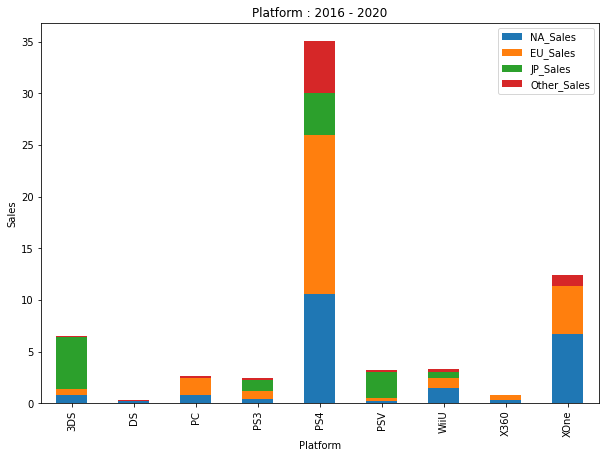

In [ ]:
plat.plot.bar(stacked = True, figsize = (10,7))
plt.ylabel('Sales')
plt.title('Platform : 2016 - 2020')
plt.show()


어떤 게임 출시

In [ ]:
top5.drop(columns = ['Year','Platform']).head()

,Game_Name,Genre,Publisher,region,Sales
0,Wii Sports,Sports,Nintendo,NA_Sales,41.49
1,Super Mario Bros.,Platform,Nintendo,NA_Sales,29.08
2,Mario Kart Wii,Racing,Nintendo,NA_Sales,15.85
3,Wii Sports Resort,Sports,Nintendo,NA_Sales,15.75
4,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,NA_Sales,11.27


In [ ]:
#2015년도 이후 PS4를 이용하는 게임의 장르별 매출 순위
a = df3[df3['Year']>2015]
a = a.groupby('Genre').sum()

a

In [ ]:
#2015년도 이후 플랫폼이 ps4인 게임 인기 순위
b = df3[df3['Year']>2015]
b = b[b['Platform']== 'PS4']
b =b.groupby('Genre').sum()
b = b.sort_values(by = 'total_sales', ascending=False)
data = b.iloc[0:3, 0:4]


In [ ]:
b = df3[df3['Year']>2015]
b = b[b['Platform']== 'PS4']
b.groupby('Genre').sum()
#b =b.groupby('Genre').sum()
b.sort_values(by = 'total_sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
15963,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78
15852,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
15861,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.14
16115,Overwatch,PS4,2016,Shooter,Activision,0.64,0.68,0.14,0.26,1.72
15801,No Man's Sky,PS4,2016,Action,Hello Games,0.58,0.74,0.02,0.26,1.60
...,...,...,...,...,...,...,...,...,...,...
16022,God Eater Off Shot:Shiou-hen Twin Pack & Anima...,PS4,2016,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16051,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16050,Resident Evil 5 HD,PS4,2016,Action,Capcom,0.01,0.00,0.00,0.00,0.01
15888,This War of Mine,PS4,2016,Action,Deep Silver,0.00,0.01,0.00,0.00,0.01


In [ ]:
b = df3[df3['Year']>2015]
b = b[b['Platform']== 'PS4']
b =b.groupby('Genre').mean()
b.sort_values(by = 'total_sales', ascending=False)

In [ ]:
장르로는 액션인데, 누적매출의 게임 이름을 보면 1위부터 5위까지 액션이 없다. 

2015년-2020인기 게임 장르 : 1.스포츠  2.슈터 (여기서 스포츠를 선택할 충분한 근거가 있을까?)-> 유의도 검사 한번해보자 
2015년-2020 이후 ps4 플랫폼의 경우 인기 게임 장르 : 1. 스포츠, 2.슈터 3.액션 (2,3위 비슷한 결과)
->ps4는 

In [ ]:
검증해야 하는 것 
1. platform과 장르의 상관관계 (two categorical variables -> chi_square test)


2. ps4 & 장르 했을 때의 장르 인기 순은 (1.스포츠, 2,슈터, 3,액션) 순이다.
   이 세 장르의 평균이 유의미하게 다른가 (두 개 이상 -> F-TEST)
   그러나 평균을 구해봤을 때, 액션이 매우 작게 나옴. 그래서 두 개를 비교(T-test)
#귀무가설: 평균이 유의미한 차이가 없다. 
#대립가설: 평균이 유의미한 차이가 있다. 
#신뢰구간 : 95%

3. Publisher 선택할 때, publisher가 장르, 플랫폼, 매출과 상관 관계가 있는가? 
상관계수 살펴보기기대립가설: 평균이 유의미한 차이가 있다. 


3. Publisher 선택할 때, publisher가 장르, 플랫폼, 매출과 상관 관계가 있는가? 
상관계수 살펴보기

correlation : 두 변수가 어떤 형태의 관계든 관계가 있느 것. 이게 원인 결과가 될 필요 x
하나가 증가하면 다른 하나도 증가. 이게 원인과 결과일수도 있지만 그 외의 요인에 의해 같이 이동할 수도 있음.


In [ ]:
#platform과 장르의 상관관계
genplat = df3[['Genre','Platform']].astype('category')
genplat.head()
 

genplat['Genre']= genplat['Genre'].cat.codes
genplat['Platform']=genplat['Platform'].cat.codes
genplat.corr()

#선형관계가 아니다. 

,Genre,Platform
Genre,1.000000,0.026673
Platform,0.026673,1.000000


In [ ]:
pd.crosstab(df3['Genre'], df3['Platform'])
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df3['Genre'], df3['Platform']))
#pvalue = 0, 관계는 있는데 이게 선형관계는 아니다. 

In [ ]:
c = b.groupby('Genre').mean().T
shooter = c['Shooter']
sports = c['Sports']

from scipy import stats
stats.ttest_ind(shooter,sports)

#pvalue = 0.909
#결론 : 스포츠와 슈터의 매출 평균은 유의미한 차이가 없다. 
#그럼 둘 중 어떤 장르의 게임을 만들어야 할까? 

Ttest_indResult(statistic=-0.12294476737171701, pvalue=0.9051834048991474)

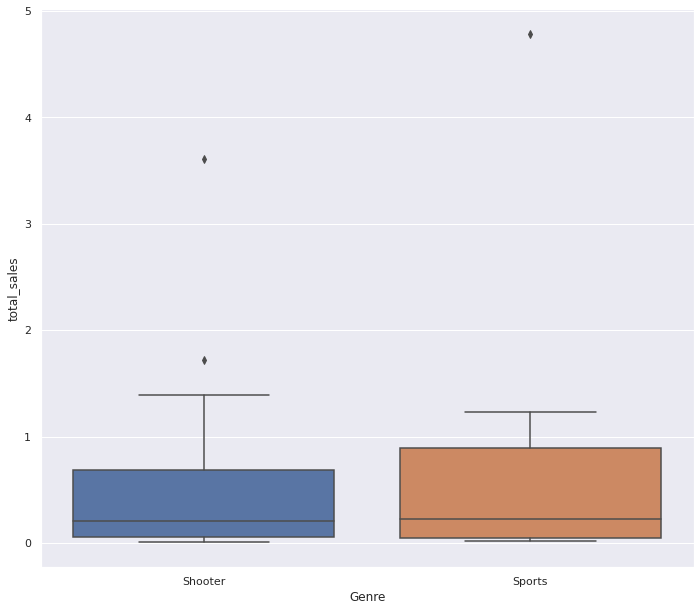

In [ ]:
#박스플랏그려보기
genre = ['Sports', 'Shooter']
d = b[b.Genre.isin(genre)]
sns.set(rc={'figure.figsize':(11.7,10.27)})
sns.boxplot(data = d, x = 'Genre', y = 'total_sales')
#d = d[['Sports','Shooter']]
plt.show()

In [ ]:
d.reset_index(drop=True)

,Year,Genre,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1995,Fighting,NG,0.00,0.00,0.03,0.00
1,1995,Fighting,PS,0.00,0.00,0.30,0.02
2,1995,Shooter,SAT,0.00,0.00,0.03,0.00
3,1995,Misc,PS,0.00,0.00,0.04,0.00
4,1995,Strategy,PS,0.14,0.09,0.00,0.02
...,...,...,...,...,...,...,...
1466,1999,Strategy,PS,0.10,0.07,0.31,0.03
1467,1999,Racing,PS,0.15,0.10,0.00,0.02
1468,1999,Action,PS,1.10,0.14,0.00,0.04
1469,1999,Platform,PS,0.22,0.15,0.00,0.03


In [ ]:
e = d.loc[:,['Genre','NA_Sales',	'EU_Sales',	'JP_Sales'	,'Other_Sales',	'total_sales']]
e

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
15800,Shooter,0.17,0.21,0.00,0.07,0.45
15806,Shooter,0.09,0.08,0.01,0.04,0.22
15809,Shooter,0.01,0.04,0.00,0.01,0.06
15825,Sports,0.00,0.00,0.17,0.00,0.17
15829,Shooter,0.01,0.00,0.00,0.00,0.01
15837,Shooter,0.05,0.11,0.01,0.03,0.20
15846,Shooter,0.01,0.00,0.00,0.00,0.01
15852,Shooter,1.28,1.61,0.15,0.57,3.61
15857,Sports,0.01,0.16,0.09,0.03,0.29
15886,Sports,0.13,0.04,0.00,0.04,0.21


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


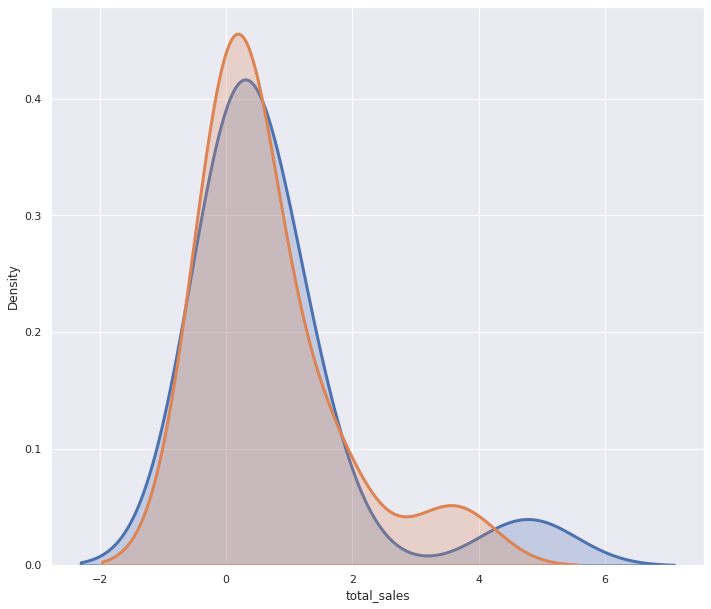

In [ ]:
#분포그래프 그리기 
sns.distplot(e[e.Genre =='Sports']['total_sales'], hist = False, kde = True, kde_kws ={'shade': True, 'linewidth': 3},label = 'Genre')
sns.distplot(e[e.Genre =='Shooter']['total_sales'], hist = False, kde = True, kde_kws ={'shade': True, 'linewidth': 3}, label = 'Genre')

plt.show()

In [ ]:
e[e.Genre =='Shooter'].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
count,12.000000,12.000000,12.000000,12.0000,12.000000
mean,0.240000,0.298333,0.030000,0.1050,0.673333
std,0.386429,0.478859,0.054606,0.1700,1.082004
min,0.010000,0.000000,0.000000,0.0000,0.010000
25%,0.025000,0.000000,0.000000,0.0100,0.055000
50%,0.050000,0.095000,0.005000,0.0350,0.210000
75%,0.250000,0.322500,0.022500,0.1075,0.685000
max,1.280000,1.610000,0.150000,0.5700,3.610000


In [ ]:
e[e.Genre =='Sports'].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.190000,0.390769,0.030769,0.113077,0.724615
std,0.321481,1.017271,0.051391,0.191328,1.292076
min,0.000000,0.000000,0.000000,0.000000,0.020000
25%,0.000000,0.030000,0.000000,0.010000,0.050000
50%,0.010000,0.080000,0.000000,0.030000,0.230000
75%,0.280000,0.160000,0.050000,0.140000,0.890000
max,0.920000,3.750000,0.170000,0.690000,4.780000


In [ ]:
스포츠 선택, 평균은 차이가 없지만, 박스 그래프를 그래봤을 때, 매출의 75%의 값이 sports는 0.89, shooter은 0.68로 더 높다. 
즉 이는, 신규 게임이 스포츠 게임의 평균보다 인기가 있을 때, 슈터 게임을 만드는 것 보다 더 많은 매출을 올릴 수 있다는 것이다. 

In [ ]:
#Publisher 결정 
genpublish = df3[['Genre','Publisher']].astype('category')
genpublish.head()
 

genpublish['Genre']= genpublish['Genre'].cat.codes
genpublish['Pulibher']=genpublish['Publisher'].cat.codes
genpublish.corr()

#카이제곱결과 pvalue= 0. 관계는 있지만 선형관계는 아니다. 

,Genre,Pulibher
Genre,1.000000,-0.050738
Pulibher,-0.050738,1.000000


In [ ]:
pp = df3[['Platform','Publisher']].astype('category')
pp.head()

pp['Platform']=pp['Platform'].cat.codes
pp['Plublisher']=pp['Publisher'].cat.codes
pp.corr()


#카이제곱결과 pvalue= 0. 관계는 있지만 선형관계는 아니다.

,Platform,Plublisher
Platform,1.000000,-0.018486
Plublisher,-0.018486,1.000000



.cat.codes converts your category from a string representation into an integer representation. For example, media lawyer would be replaced with 0, student would be replaced with 1, professor would be replaced with 2. In the other column, print would be replaced with 0 and online would be replaced with 1

In [ ]:
b = df3[df3['Year']>2015]
b = b[b['Platform']== 'PS4']

In [ ]:
p = b[b['Genre']=='Sports'].groupby('Publisher').sum()
p

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Publisher,,,,,
505 Games,0.02,0.14,0.00,0.07,0.23
Alternative Software,0.00,0.03,0.00,0.01,0.04
Avanquest,0.00,0.02,0.00,0.00,0.02
Electronic Arts,1.61,4.34,0.06,1.10,7.11
Focus Home Interactive,0.00,0.04,0.00,0.01,0.05
Konami Digital Entertainment,0.01,0.37,0.29,0.06,0.73
Take-Two Interactive,0.83,0.14,0.00,0.22,1.19
Tecmo Koei,0.00,0.00,0.05,0.00,0.05


In [ ]:
분석결과, 퍼블리셔는 게임장르, 플랫폼과 관계가 있기 때문에, 그 중에서 뽑아서 가장 매출이 높은 곳인 electronic arts로 정한다. 